### 1. Read Image

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt


originalImage = cv2.imread('image.jpg',0)

### 2. Apply Gaussian Noise on it

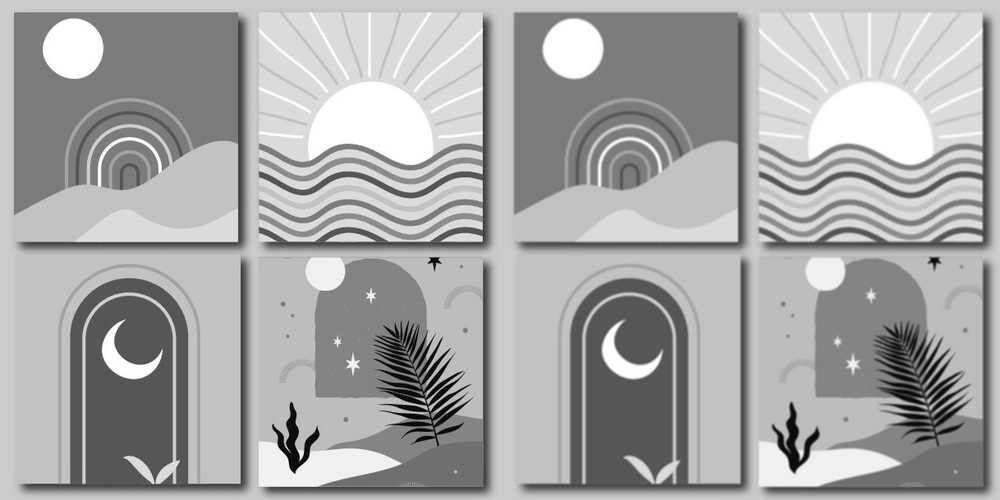

In [ ]:
Blurred_image = cv2.GaussianBlur(originalImage,(3,3),1)

stackedImages = np.hstack((originalImage, Blurred_image))
cv2_imshow(stackedImages)

### Apply different smoothing filters with different window size (Average, median filter, mean filter)

1- Average filter


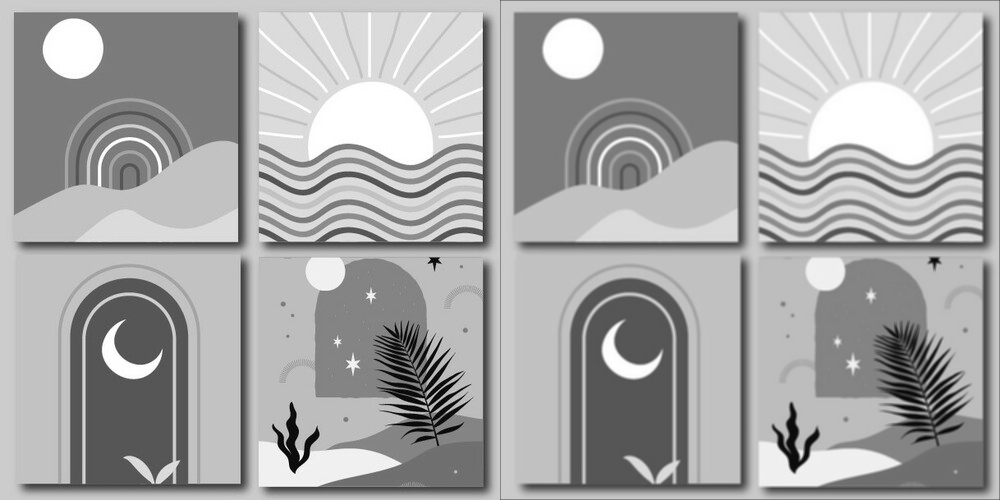

In [ ]:
imageWithPadding= cv2.copyMakeBorder(originalImage,1,1,1,1,0,(0,0,0)) # cv2.BORDER_CONSTANT

originalWidth, originalHeight = originalImage.shape
paddingWidth, paddingHeight = imageWithPadding.shape
  
mask = np.ones([3, 3])
mask = mask / 9
  
averagedImage = np.zeros([originalWidth,originalWidth])
for i in range(1, paddingWidth-1):
    for j in range(1, paddingHeight-1):
        average = imageWithPadding[i-1, j-1]*mask[0, 0]+imageWithPadding[i-1, j]*mask[0, 1]+imageWithPadding[i-1, j + 1]*mask[0, 2]+imageWithPadding[i, j-1]*mask[1, 0]+ imageWithPadding[i, j]*mask[1, 1]+imageWithPadding[i, j + 1]*mask[1, 2]+imageWithPadding[i + 1, j-1]*mask[2, 0]+imageWithPadding[i + 1, j]*mask[2, 1]+imageWithPadding[i + 1, j + 1]*mask[2, 2]
        
        averagedImage[i-1, j-1] = average

stackedImages = np.hstack((originalImage, averagedImage))
cv2_imshow(stackedImages)

2- Median filter

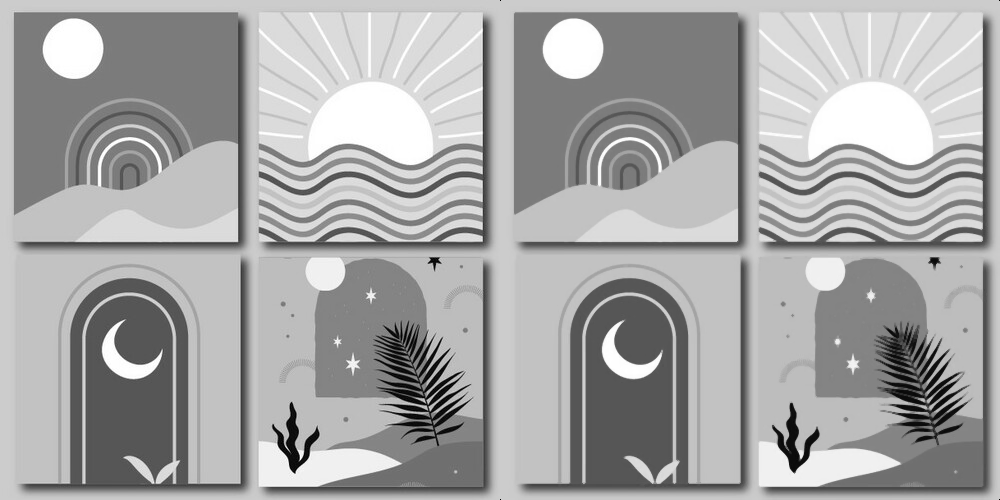

In [ ]:
# Median
medianImage = np.zeros([originalWidth, originalHeight])

for i in range(1, paddingWidth-1):
    for j in range(1, paddingHeight-1):
        numbers = [imageWithPadding[i-1, j-1],
               imageWithPadding[i-1, j],
               imageWithPadding[i-1, j + 1],
               imageWithPadding[i, j-1],
               imageWithPadding[i, j],
               imageWithPadding[i, j + 1],
               imageWithPadding[i + 1, j-1],
               imageWithPadding[i + 1, j],
               imageWithPadding[i + 1, j + 1]]
         
        numbers = np.sort(numbers)
        medianImage[i-1, j-1]= numbers[4]

stackedImages = np.hstack((originalImage, medianImage))
cv2_imshow(stackedImages)

### Apply different sharpening filters. ( Perwitt, Sobel )
1- Perwitt

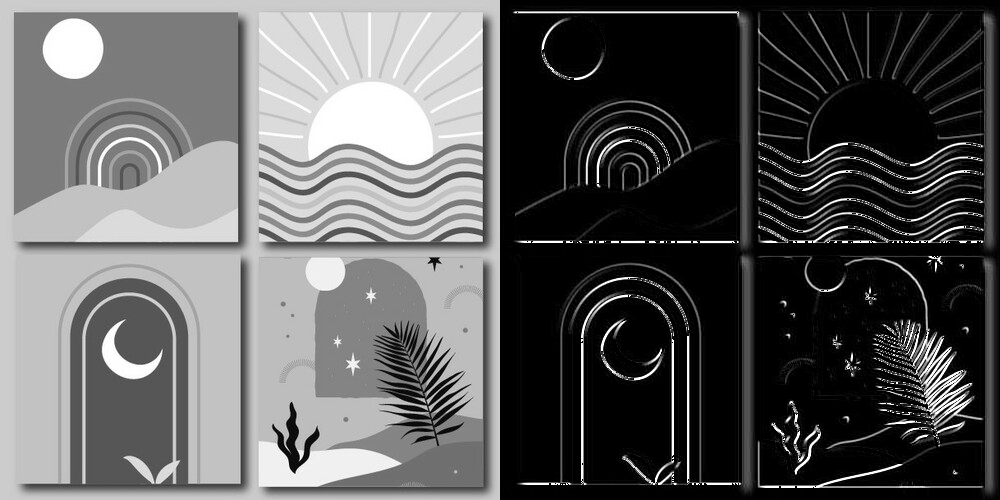

In [ ]:
filterX = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
filterY = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

imgPrewittx = cv2.filter2D(originalImage, -1, filterX)
imgPrewitty = cv2.filter2D(originalImage, -1, filterY)
imgPrewitt = imgPrewittx + imgPrewitty

stackedImages = np.hstack((originalImage, imgPrewitt))
cv2_imshow(stackedImages)

2- Sobel

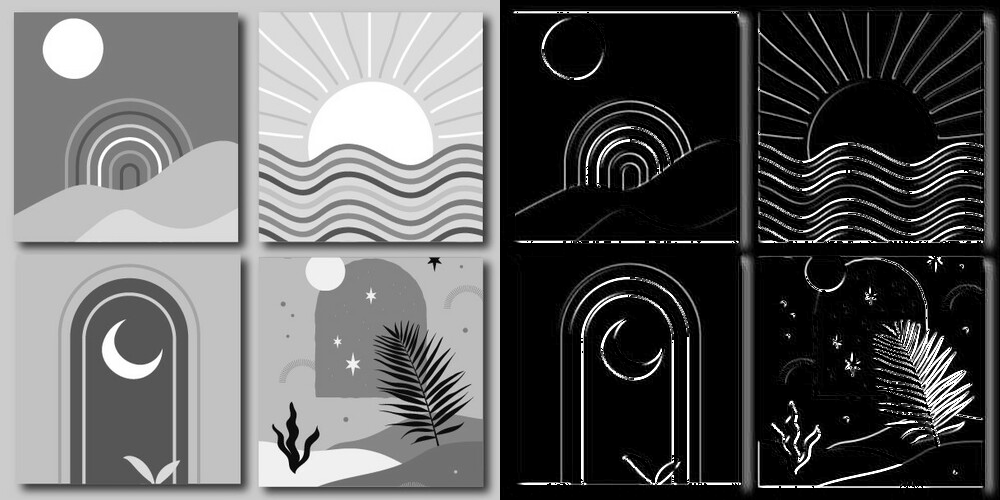

In [ ]:
filterX = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
filterY = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

sobelX = cv2.filter2D(originalImage, -1, filterX) # -1 will give the output image depth as same as the input image
sobelY = cv2.filter2D(originalImage, -1, filterY)

sobelImage = sobelX + sobelY
stackedImages = np.hstack((originalImage, sobelImage))
cv2_imshow(stackedImages)